# R1

Github repo: [`github.com/christoffer-s/notebooks`](https://github.com/christoffer-s/notebooks) 

Branch: main

<br>
<br/>



> Det eneste jeg savner er resten 
>
> \- Carmen

---

## Innholdsfortegnelse
[Grenseverdier](#grenseverdier)

[Gjennomsnitt](#gjennomsnitt)

[Andregradsfunksjon](#andregradsfunksjon)

[Polynomfunksjon](#derivasjon-av-polynomfunksjon)

[2.305 Sinus R1](#oppgave-2305-sinus-r1)

## Grenseverdier

---

In [ ]:
def f(x):
    return (x + 1) ** 2


a = float(input("Skriv a verdien: "))
nøyaktighet = 0.00000001
pres = 6

print(f"Øvre grenseverdi: f({round(a - nøyaktighet, pres)}) = {round(f(a - nøyaktighet), pres)}")
print(f"Nedre grenseverdi: f({round(a + nøyaktighet, pres)}) = {round(f(a + nøyaktighet), pres)}")

In [ ]:
from numpy import log10

# funksjon
def f(x):
    return (2 * x**2 - 7*x +5) / (x - 1)


a = float(input("Skriv a verdien: "))       # input fra bruker som gjøres om til float (desimaltall)

nøyaktighet = 0.0000000001                  # angir nøyaktigheten til tilnærmingsverdien
pres = int(abs(log10(nøyaktighet)) - 1)     # round funktionen oppgis i antall nuller eller log10() 

# setter opp variablene i et forsøk på å øke lesbarhet
x_øvre, x_nedre = a + nøyaktighet, a - nøyaktighet
y_øvre, y_nedre = round(f(x_øvre), pres), round(f(x_nedre), pres)

# dersom funksjonen er kontinuerlig printes svaret kun en gang
if y_øvre == y_nedre:
    print("Funksjonen er kontinuerlig")
    print(f"Grenseverdien for f({round(x_øvre, pres)}) = {y_øvre}")

else:
    print("Funksjonen er diskontinuerlig")
    print(f"Øvre grenseverdi: f({round(x_øvre, pres)}) = {y_øvre}")
    print(f"Nedre grenseverdi: f({round(x_nedre, pres)}) = {y_nedre}")

In [3]:
def integer(n):
    if isinstance(n, list):
        for i, num in enumerate(n):
            try:
                if float(num).is_integer():
                    n[i] = int(float(num))
                
                else:
                    n[i] = float(num)
            
            except:
                continue
        
        return n


    else:
        try:
            if float(n).is_integer():
                return int(float(n))
            
            else:
                return float(n)
        except:
            return n
    

tall = "4.2"
print([integer(tall)])

[4.2]


In [4]:
print(int(0.0))

print(int("0"))

print(int(float("0.0")))

print(int("0.0"))

0
0
0


ValueError: invalid literal for int() with base 10: '0.0'

## Gjennomsnitt

---

In [ ]:
def avg(x, pres):
    return round(sum(x) / len(x), pres)


liste = [3, 4, 5, 6, 7, 2, 2, 2]

avg(liste, 3)

In [ ]:
pres = 3
nums = []

while True:
    try:
        val = input(f"Tall som er i listen: {*nums,}\nSkriv inn tall: ")
        val = float(val)
        nums.append(val)

    except ValueError:
        if val == " ":
            avg = round(sum(nums) / len(nums), pres)
            break

        else:
            print("Skriv et tall eller mellomrom for å avslutte")
            continue

    except Exception as e:
        print("Error", e)
        avg = None
        break

print(f"Gjennomsnittet av: {', '.join(str(x) for x in nums)} = {avg} ")

## Andregradsfunksjon

---

In [ ]:
#   #   #   #   #   #   #   #   #   #   #   #   #
#                                               #
#    Legge til grafing av f'(x)                 #
#                                               #
#    Bedre UI for svar og grafing               #
#                                               #
#   #   #   #   #   #   #   #   #   #   #   #   #

from matplotlib import pyplot as plt
from numpy import linspace, sqrt


class andregradsfunksjon():
    ''' A class to analyse second degree polynomial functions. Expected form: f(x) = ax^2+bx+c'''  

    def __init__(self, uttrykk):
        self.uttrykk = uttrykk
        self.navn, self.a, self.b, self.c = self.formatering()


    def formatering(self):
        uttrykk = self.uttrykk
        index = 0
        
        for i, letter in enumerate(uttrykk):
            if letter == "=":
                navn = uttrykk[0:i - 1]
                a_index = i + 2
                
            elif letter == "+" or letter == "-":
                if not index and i != a_index:
                    b_index = i
                    index = 1

                elif index:
                    c_index = i
                    break
        
        a = float(self.uttrykk[a_index:b_index - 3])
        b = float(self.uttrykk[b_index:c_index - 1])
        c = float(self.uttrykk[c_index:])
        
        return navn, a, b, c


    def funksjon_uttrykk(self):
        return self.uttrykk


    def funksjon_punkt(self, x):
        return self.a*x**2 + self.b*x + self.c


    def funksjon_nullpunkter(self):
        a = self.a
        b = self.b
        c = self.c

        if (b**2) - (4*a*c) >= 0:
            rot = sqrt((b**2) - (4*a*c))
            
            x1 = (-b - rot) / (2*a)
            x2 = (-b + rot) / (2*a)

        else:
            x1 = None
            x2 = None

        return x1, x2


    def ekstremalpunkt(self):
        x = (-self.b) / (2 * self.a)
        return x, self.funksjon_punkt(x)


    def derivert(self):
        uttrykk = self.uttrykk
        
        for i, letter in enumerate(uttrykk):
            if letter == "(":
                temp_navn = uttrykk[0:i] + "'" + uttrykk[i:i + 3] 
                return f"{temp_navn} = {2*self.a}x + {self.b}"
                
        else:
            return None


    def derivert_punkt(self, x):
        return (2 * self.a * x) + self.b

    
    def funksjon_graf(self, x_start, x_stopp):
        x = linspace(x_start, x_stopp)
        plt.grid()
        plt.plot(x, self.funksjon_punkt(x), label = self.funksjon_uttrykk())
        plt.legend()     
        plt.show()

        

In [ ]:
f = andregradsfunksjon("f(x) = 1x^2+4x+4")
print(f.funksjon_uttrykk())
print(f.derivert())
print(f.funksjon_punkt(3))
print(f.derivert_punkt(3))
print(f.funksjon_nullpunkter())
print(f.ekstremalpunkt())
f.funksjon_graf(-2, 5)


## Derivasjon av polynomfunksjon

---

algoritmen $ : n\cdot ax^{n-1}+p\cdot bx^{p-1}+q\cdot cx^{q-1}\cdots$

In [ ]:
# function must be ordered from highest to lowest grade.
import re

class poly():
    def __init__(self, expression):
        self.expression = expression # expected form f(x) = 2x^3-0x^2+3x-2
        self.terms = self.abc()
        self.delta_x = 0.000001
        self.pers = 4
    
    
    def abc(self):
        function = self.expression
        indexed = []

        index = function.index("=") + 2

        string = function[index:]
        stripped = re.split(r'([-+])', string)


        if stripped[0] == "":
            stripped.pop(0)
            start = 0

        else:
            indexed.append(stripped[0])
            start = 1


        loops = len(stripped) // 2
        for i in range(loops):
            merged = stripped[-i * 2 - 2] + stripped[-i * 2 - 1]
            indexed.insert(start, merged)

        return indexed
   
        

    def numerical(self, x):
        terms = self.terms
        counter = 0

        for element in terms:
            try:
                index = element.index("x")
                a = float(element[:index])
                
                try:
                    n = float(element[index + 2:])

                except:
                    n = 1
             
                counter += a * x**n
            
            except:
                counter += float(element)
    
        return counter


    def limit(self, x):
        pass


    def derivation_numerical(self, x):
        return round((self.numerical(x + 0.000001) - self.numerical(x)) / 0.000001, 4) # bruk samme delta x som grenseverdi, ha var i __init__, evt class var


    def derivation_symbolic(self):
        terms = self.terms
        symbolic = []

        if "x" not in terms[-1]:
            terms.pop(-1)

        for element in terms:
            index = element.index("x")
            a = float(element[:index])

            if a != 0: # fjern når abc() er omskrevet
                try:
                    n = float(element[index + 2:])
                    a = a*n
                    symbolic.append(f"{a*n}x^{n-1}")

                except:
                    n = 1
                    symbolic.append(str(a))
        
        return " ".join(symbolic)





f = poly("f(x) = -2x^3-0x^2+3x-2")
g = poly("g(x) = 2x")
print(f.terms)
# print(f.numerical(1))
# print(f.derivation_numerical(1))
print(f.derivation_symbolic())


In [ ]:
terms = ['-2x^3', '-0x^2', '+3x', '-2']
symbolic = []

if "x" not in terms[-1]:
    terms.pop(-1)

for element in terms:
    index = element.index("x")
    a = float(element[:index])

    if a != 0:
        try:
            n = float(element[index + 2:])
            a = a*n
            symbolic.append(f"{a*n}x^{n-1}")

        except:
            n = 1
            symbolic.append(a)
  

    
print(terms)
print(symbolic)

## Oppgave 2.305 Sinus R1
---

In [ ]:
def f(x):
    return x**2 + x - 20


def g(x):
    return x - 4


# kan både derivere både f(x) og g(x) numerisk 
def num_deri(x, f):
    dx = 0.0000001
    return round((f(x + dx) - f(x)) / dx, 5)


# for å få "brøkstrek"
def brøk(txt):
    return '\x1B[4m' + str(txt) + '\x1B[0m'


x = float(input("a: "))     # x verdi til funksjonenene 
length = len(str(x))        # brukes til formatering slik at ting får riktig avstand fra hverandre
fx = brøk("f\'(x)")         # kan ikke bruke backlash i f-string, må derfor ha en egen variabel for uttrykket

# printer vanlig grenseverdi, kun printing ikke regning
print(f"lim{' ':{length}} {brøk('f(x)')}   =  {brøk(f(x))}")
print(f"x->{x} g(x)      {g(x)}\n")

# printer L'Hôpitals regel, renger det numerisk
print(f"lim{' ':{length}} {fx}  =  {brøk(num_deri(x, f))}  =  {num_deri(x, f) / num_deri(x, g)}")
print(f"x->{x} g'(x)     {num_deri(x, g)}")

In [ ]:
from numpy import sqrt, linspace, e
from matplotlib import pyplot as plt

def f(x):
    return -e**(2*x)

def numerisk(f, x, delta_x):
    return (f(x + delta_x) - f(x))/delta_x

def analytisk(x):
    return -2*e**(2*x)

def funksjon_graf(x_start, x_stopp):
    x = linspace(x_start, x_stopp)
    plt.grid()
    plt.plot(x, f(x))
    plt.plot(x, analytisk(x))   
    plt.show()

xstart, xslutt = -2, 2
x = xstart

xsteg = 1
delta_x = 0.00000000001

while x <= xslutt:
    y1 = numerisk(f, x, delta_x)
    y2 = analytisk(x)
    differanse = abs(y1-y2)
    
    print(f"x     = {x}")
    print(f"f(x)  = {f(x)}")
    print(f"f'(x) = {y1:.3f}")
    print(f"f'(x) = {y2:.3f}")
    print(f"diff  = {differanse:.3f}\n")
    x += xsteg

funksjon_graf(xstart, xslutt)

/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_11011/142439351.py:18: RuntimeWarning: overflow encountered in exp
  y_fitted = a * np.exp(b * x_fitted) + c


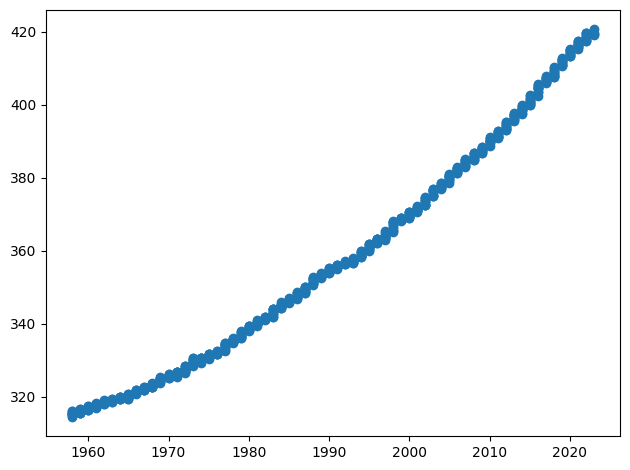

In [40]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit


df = pd.read_csv("co2.csv", usecols=["year", "deseasonalized"], index_col=False)
år = df.loc[:, 'year']
utslipp = df.loc[:, 'deseasonalized']


popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, år, utslipp)
a = popt[0]
b = popt[1]
c = popt[2]

x_fitted = np.linspace(np.min(år), np.max(år), 100)
y_fitted = a * np.exp(b * x_fitted) + c

ax = plt.axes()
ax.scatter(år, utslipp, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')


In [26]:
import sklearn



FileNotFoundError: [Errno 2] No such file or directory: 'python -m pip install scikit-learn statsmodels'

In [ ]:
from math import sqrt

print("skriv punktet: x,y")
xp, yp = input("punkt: ").split(",")
xs, ys = input("sentrum: ").split(",")
r = float(input("radius: "))

p = [float(xp), float(yp)]
s = [float(xs), float(ys)]

def sirkel(p, r):
    h = sqrt((p[0] - s[0])**2 + (p[1] - s[1])**2)


    if h == r:
        return "punktet er på sirklen"

    elif h < r:
        return "punktet er i sirklen"

    elif h > r:
        return "punktet er utenfor sirklen"

    else:
        return "error"

sirkel(p, r)

In [ ]:
from math import sqrt

a = [float(kor) for kor in input("A: ").split(",")]
b = [float(kor) for kor in input("B: ").split(",")]
c = [float(kor) for kor in input("C: ").split(",")]

AB = sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)
AC = sqrt((c[0] - a[0])**2 + (c[1] - a[1])**2)
BC = sqrt((c[0] - b[0])**2 + (c[1] - b[1])**2)

if sqrt(AB**2 + AC**2) == BC:
    print("den er rettvinklet")

elif sqrt(AB**2 + BC**2) == AC:
    print("den er rettvinklet")

elif sqrt(BC**2 + AC**2) == AB:
    print("den er rettvinklet")

else:
    print("u poop")

In [10]:
# vektor regning
from math import sqrt

x,y = float(input("X: ")), float(input("Y: "))

a = [x, y]

length = sqrt(abs(a[0])**2 + abs(a[1])**2)

print(length)

5.830951894845301


In [10]:
def f(x):
    return 3*x**2 - 5*x - 4


def derivert(x):
    h = 0.01
    return (f(x + h) - f(x)) / h

print(derivert(1))
print(round(derivert(1), 2))


1.0299999999999976
1.03


In [19]:
def f(x):
    return -4*x +3

xstart = -6.0
xstopp = 7.0

x = xstart

while x <= xstopp:
    print(f"x: {round(x, 2):{3}}   |   f(x): {round(f(x), 2)}")
    x += 0.1

x: -6.0   |   f(x): 27.0
x: -5.9   |   f(x): 26.6
x: -5.8   |   f(x): 26.2
x: -5.7   |   f(x): 25.8
x: -5.6   |   f(x): 25.4
x: -5.5   |   f(x): 25.0
x: -5.4   |   f(x): 24.6
x: -5.3   |   f(x): 24.2
x: -5.2   |   f(x): 23.8
x: -5.1   |   f(x): 23.4
x: -5.0   |   f(x): 23.0
x: -4.9   |   f(x): 22.6
x: -4.8   |   f(x): 22.2
x: -4.7   |   f(x): 21.8
x: -4.6   |   f(x): 21.4
x: -4.5   |   f(x): 21.0
x: -4.4   |   f(x): 20.6
x: -4.3   |   f(x): 20.2
x: -4.2   |   f(x): 19.8
x: -4.1   |   f(x): 19.4
x: -4.0   |   f(x): 19.0
x: -3.9   |   f(x): 18.6
x: -3.8   |   f(x): 18.2
x: -3.7   |   f(x): 17.8
x: -3.6   |   f(x): 17.4
x: -3.5   |   f(x): 17.0
x: -3.4   |   f(x): 16.6
x: -3.3   |   f(x): 16.2
x: -3.2   |   f(x): 15.8
x: -3.1   |   f(x): 15.4
x: -3.0   |   f(x): 15.0
x: -2.9   |   f(x): 14.6
x: -2.8   |   f(x): 14.2
x: -2.7   |   f(x): 13.8
x: -2.6   |   f(x): 13.4
x: -2.5   |   f(x): 13.0
x: -2.4   |   f(x): 12.6
x: -2.3   |   f(x): 12.2
x: -2.2   |   f(x): 11.8
x: -2.1   |   f(x): 11.4
